# Регуляризация линейной регрессии. Практическая работа

## Цель практической работы

Научиться строить модель линейной регрессии с регуляризацией на реальных данных.

## Что входит в практическую работу

1. Загрузить данные и ознакомиться с ними.
2. Изучить данные и провести анализ, сконструировать новые признаки.
3. Разделить данные на обучающую и тестовую выборки.
4. Реализовать построение модели с помощью библиотеки Scikit-learn.
5. Подобрать коэффициенты регуляризации.
6. Получить качество модели с помощью MSE, MAE, $R^2$.
7. Ответить на вопросы в конце блокнота.

## Что оценивается 

- Выполнены все этапы работы.
- Подобраны коэффициенты регуляризации.
- Сделан вывод по результатам.
- Модель не переобучена.
- Получена модель хорошего качества.
- Сделаны выводы в конце блокнота.

## Как отправить работу на проверку

Скачайте файл с заданиями в материалах, откройте его через Jupyter Notebook и выполните задания.

## Задача

С набором данных вы уже знакомы из прошлого модуля — это данные по продажам домов. В этот раз признаков будет чуть больше, чтобы вам было интереснее. Краткое описание признаков:

* **LotArea** — размер участка в квадратных футах.
* **LotArea_M** — размер участка в квадратных метрах.
* **Street** — тип доступа к дороге.
* **BldgType** — тип жилья.
* **OverallQual** — общее качество материала и отделки.
* **OverallCond** — общая оценка состояния.
* **YearBuilt** — первоначальная дата постройки.
* **YearRemodAdd** — дата реконструкции.
* **RoofStyle** — тип крыши.
* **ExterQual** — качество материалов снаружи.
* **ExterCond** — текущее состояние материалов снаружи.
* **Foundation** — тип фундамента.
* **TotalBsmtSF** — общая площадь подвала в квадратных футах.
* **TotalBsmtSF_M** — общая площадь подвала в квадратных метрах.
* **Heating** — тип отопления.
* **HeatingQC** — качество и состояние отопления.
* **CentralAir** — кондиционирование.
* **GrLivArea** — жилая площадь в квадратных футах.
* **GrLivArea_M** — жилая площадь в квадратных метрах.
* **Bath** — количество ванных комнат.
* **KitchenQual** — качество кухни.
* **GarageArea** — площадь гаража в квадратных футах.
* **GarageArea_M** — площадь гаража в квадратных метрах.
* **DateSold** — месяц и год продажи.
* **SaleCondition** — условия сделки.
* **SalePrice** — стоимость продажи в долларах. Это целевая переменная, которую нам нужно предсказать.

Постройте модель линейной регрессии на этих данных. Проверьте качество модели на обучающей и тестовой выборках с помощью MAE, MSE, $R^2$. Определите, что модель не переобучилась.

## Задание 1 

Подключите необходимые библиотеки.

In [116]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize

## Задание 2

Считайте данные и посмотрите на несколько строк.

In [117]:
df = pd.read_csv('data.csv')
df.head()

,LotArea,LotArea_M,Street,BldgType,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,ExterQual,...,CentralAir,GrLivArea,GrLivArea_M,Bath,KitchenQual,GarageArea,GarageArea_M,DateSold,SaleCondition,SalePrice
0,8450,785.03035,Pave,1Fam,7,5,2003,2003,Gable,Gd,...,Y,1710,158.864130,3,Gd,548,50.910844,2/2008,Normal,208500
1,9600,891.86880,Pave,1Fam,6,8,1976,1976,Gable,TA,...,Y,1262,117.243586,2,TA,460,42.735380,5/2007,Normal,181500
2,11250,1045.15875,Pave,1Fam,7,5,2001,2002,Gable,Gd,...,Y,1786,165.924758,3,Gd,608,56.485024,9/2008,Normal,223500
3,9550,887.22365,Pave,1Fam,7,5,1915,1970,Gable,TA,...,Y,1717,159.514451,1,Gd,642,59.643726,2/2006,Abnorml,140000
4,14260,1324.79678,Pave,1Fam,8,5,2000,2000,Gable,Gd,...,Y,2198,204.200794,3,Gd,836,77.666908,12/2008,Normal,250000


## Задание 3 

Проведите разведочный анализ:

1. Выведите описательные статистики для числовых признаков.

In [118]:
df.describe(include='number')

,LotArea,LotArea_M,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,TotalBsmtSF_M,GrLivArea,GrLivArea_M,Bath,GarageArea,GarageArea_M,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,977.044879,6.099315,5.575342,1971.267808,1984.865753,1057.429452,98.238368,1515.463699,140.791124,1.947945,472.980137,43.941274,180921.195890
std,9981.264932,927.289456,1.382997,1.112799,30.202904,20.645407,438.705324,40.757041,525.480383,48.818704,0.794965,213.804841,19.863111,79442.502883
min,1300.000000,120.773900,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,334.000000,31.029602,0.000000,0.000000,0.000000,34900.000000
25%,7553.500000,701.742811,5.000000,5.000000,1954.000000,1967.000000,795.750000,73.927562,1129.500000,104.933938,1.000000,334.500000,31.076054,129975.000000
50%,9478.500000,880.581085,6.000000,5.000000,1973.000000,1994.000000,991.500000,92.113325,1464.000000,136.009992,2.000000,480.000000,44.593440,163000.000000
75%,11601.500000,1077.814155,7.000000,6.000000,2000.000000,2004.000000,1298.250000,120.611320,1776.750000,165.065405,3.000000,576.000000,53.512128,214000.000000
max,215245.000000,19996.906235,10.000000,9.000000,2010.000000,2010.000000,6110.000000,567.637330,5642.000000,524.158726,4.000000,1418.000000,131.736454,755000.000000


2. Постройте матрицу корреляций числовых признаков. Удалите линейно-зависимые признаки из данных.

In [119]:
df.corr(numeric_only=True)

,LotArea,LotArea_M,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,TotalBsmtSF_M,GrLivArea,GrLivArea_M,Bath,GarageArea,GarageArea_M,SalePrice
LotArea,1.000000,1.000000,0.105806,-0.005636,0.014228,0.013788,0.260833,0.260833,0.263116,0.263116,0.096360,0.180403,0.180403,0.263843
LotArea_M,1.000000,1.000000,0.105806,-0.005636,0.014228,0.013788,0.260833,0.260833,0.263116,0.263116,0.096360,0.180403,0.180403,0.263843
OverallQual,0.105806,0.105806,1.000000,-0.091932,0.572323,0.550684,0.537808,0.537808,0.593007,0.593007,0.554555,0.562022,0.562022,0.790982
OverallCond,-0.005636,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.171098,-0.171098,-0.079686,-0.079686,-0.172989,-0.151521,-0.151521,-0.077856
YearBuilt,0.014228,0.014228,0.572323,-0.375983,1.000000,0.592855,0.391452,0.391452,0.199010,0.199010,0.478016,0.478954,0.478954,0.522897
YearRemodAdd,0.013788,0.013788,0.550684,0.073741,0.592855,1.000000,0.291066,0.291066,0.287389,0.287389,0.420235,0.371600,0.371600,0.507101
TotalBsmtSF,0.260833,0.260833,0.537808,-0.171098,0.391452,0.291066,1.000000,1.000000,0.454868,0.454868,0.193469,0.486665,0.486665,0.613581
TotalBsmtSF_M,0.260833,0.260833,0.537808,-0.171098,0.391452,0.291066,1.000000,1.000000,0.454868,0.454868,0.193469,0.486665,0.486665,0.613581
GrLivArea,0.263116,0.263116,0.593007,-0.079686,0.199010,0.287389,0.454868,0.454868,1.000000,1.000000,0.699614,0.468997,0.468997,0.708624
GrLivArea_M,0.263116,0.263116,0.593007,-0.079686,0.199010,0.287389,0.454868,0.454868,1.000000,1.000000,0.699614,0.468997,0.468997,0.708624


In [120]:
cm = df.drop('SalePrice', axis=1).corr(numeric_only=True)
rm_cols = []
for col in cm:
    if (cm[col].abs() > 0.9).sum() > 1 and any(col2 != col and col2 not in rm_cols 
                                               for col2 in cm.loc[cm[col].abs() > 0.9, col].index ):
        rm_cols.append(col)

df = df.drop(rm_cols, axis=1)
rm_cols

['LotArea', 'TotalBsmtSF', 'GrLivArea', 'GarageArea']

3. Посмотрите на индивидуальные графики зависимости целевой функции и отдельной переменной.

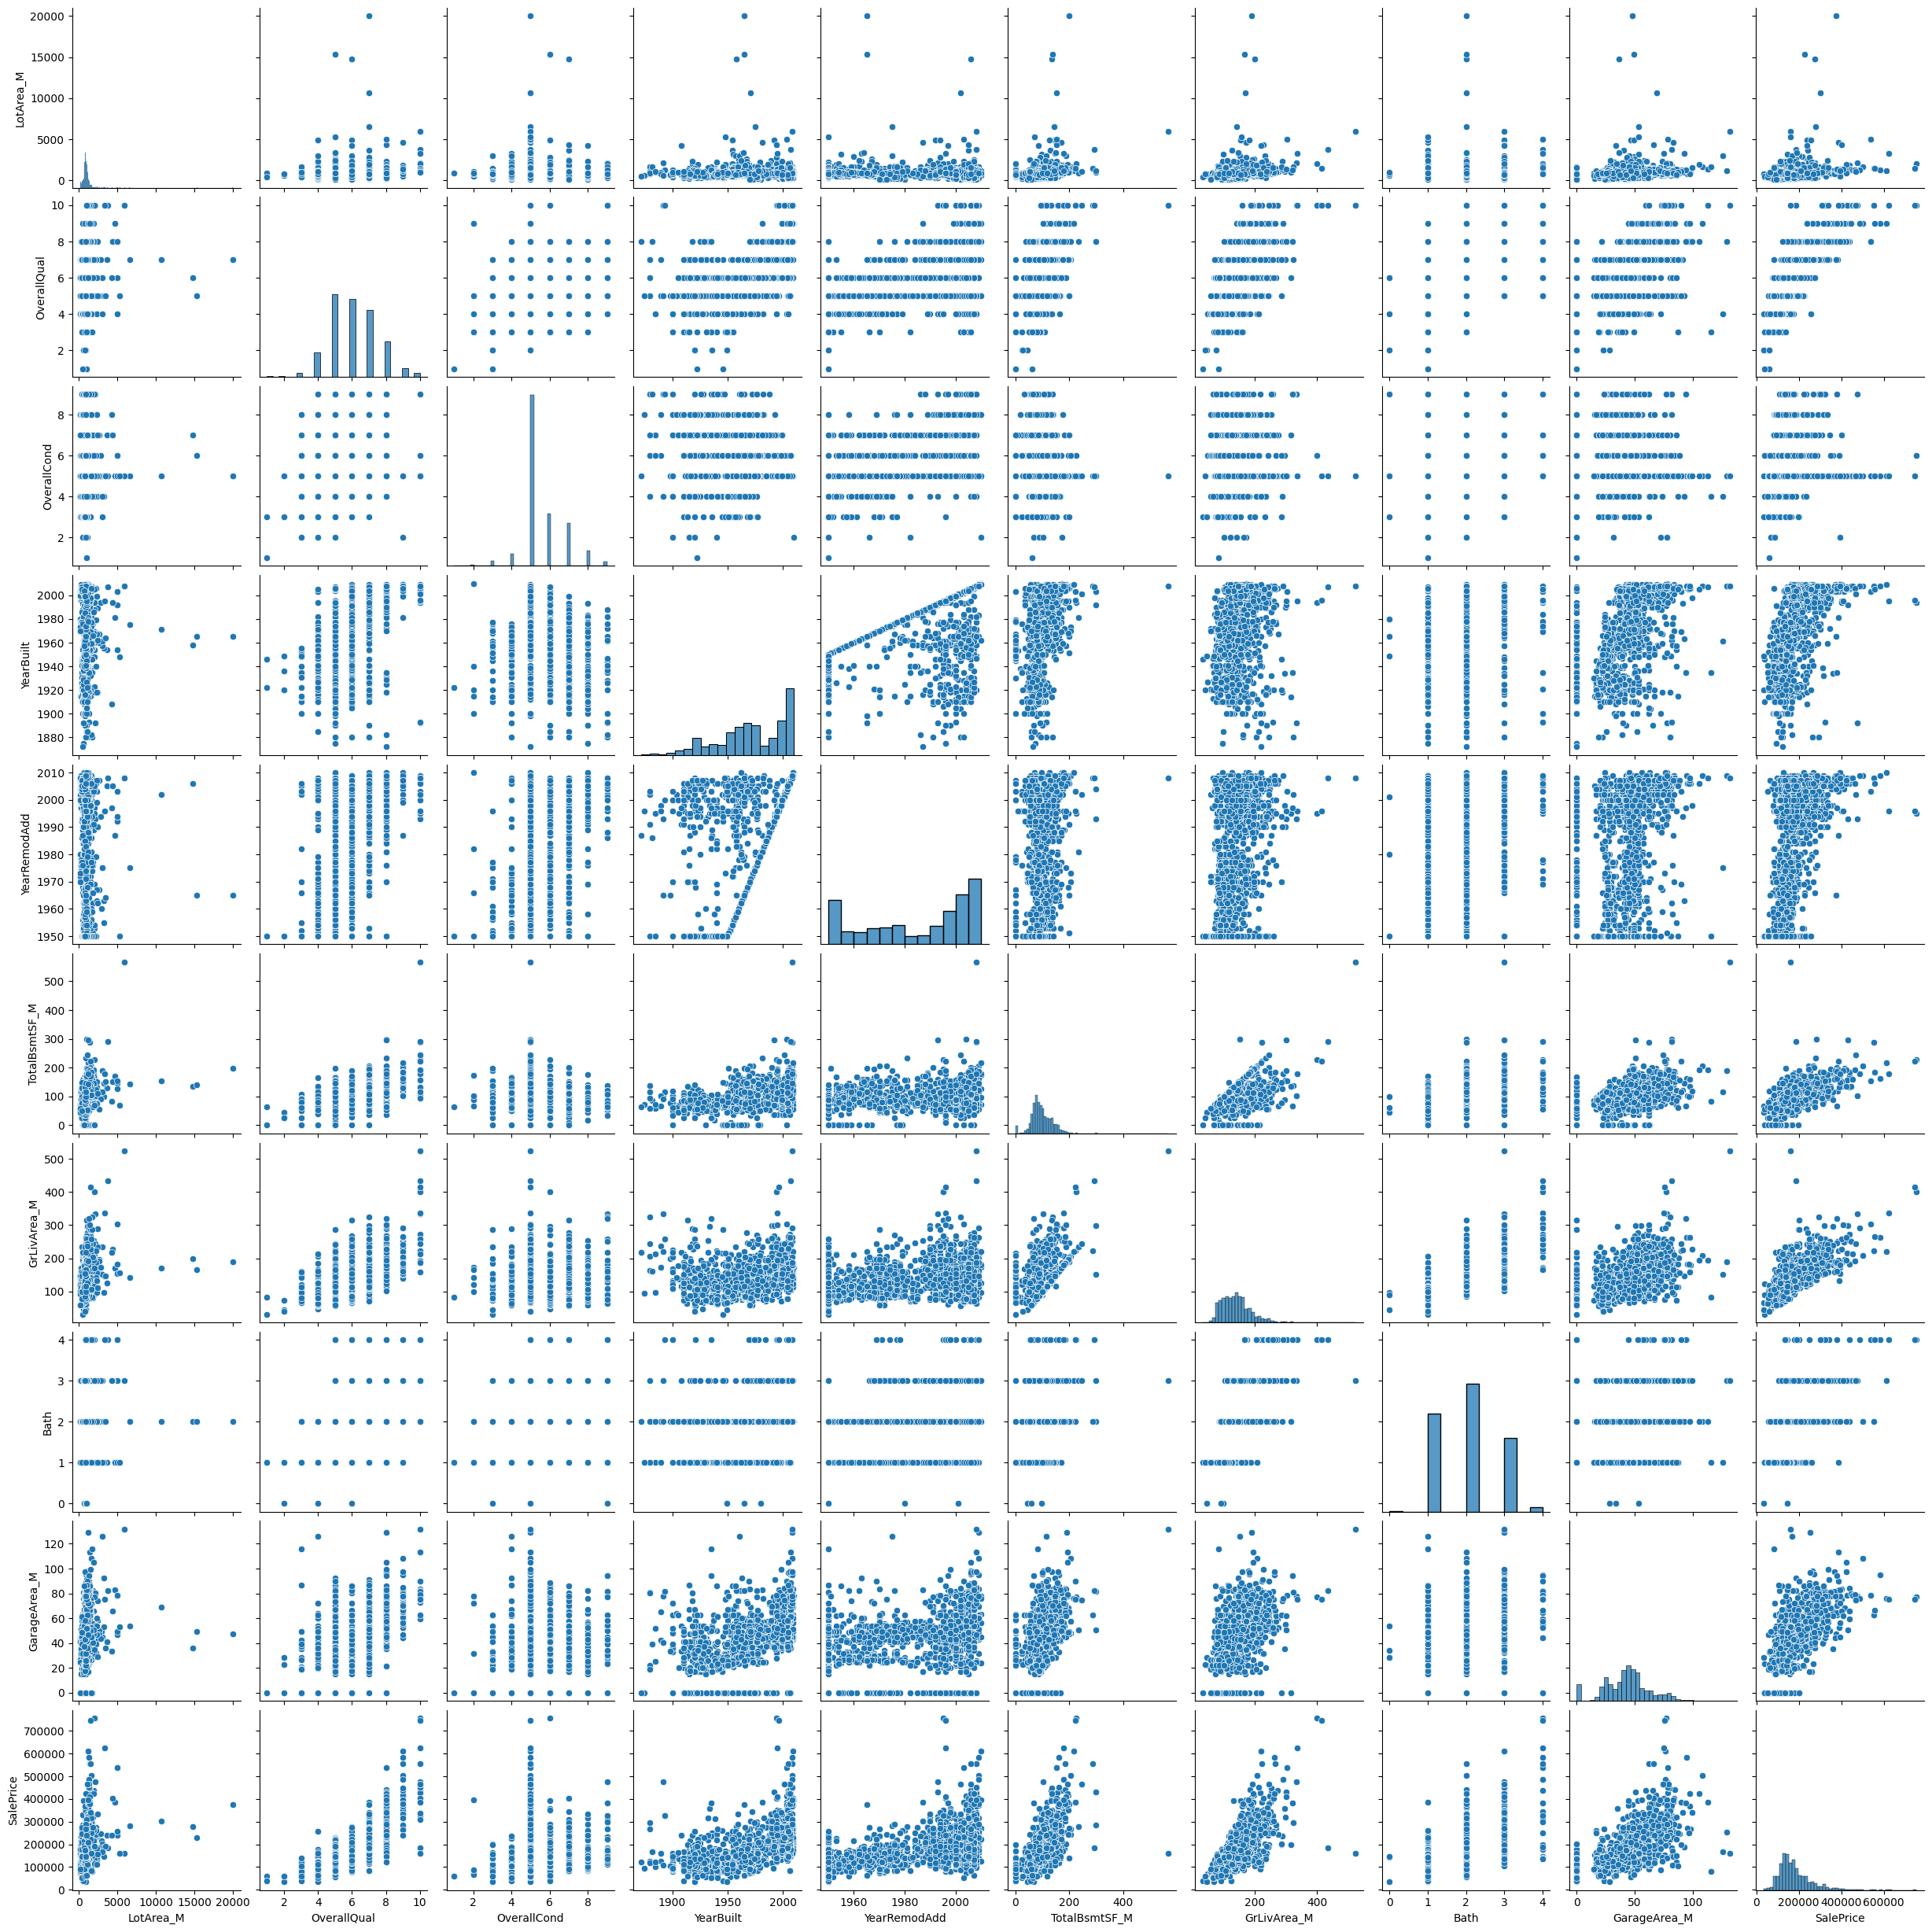

In [121]:
sns.pairplot(df)

4. Сделайте предварительные выводы.

Переменные LotArea_M, YearRemodAdd и YearBuilt имеют слабую корреляцию с целевой переменной, 

а наиболее сильную - OveralQual и GrLivArea_M.

5. Создайте дополнительные переменные из уже имеющихся, обоснуйте свои решения.

In [122]:
# Отношение площади гаража к общей площади участка
df['GarageLot'] = df['GarageArea_M'] / df['LotArea_M']

In [123]:
df[['GarageLot', 'SalePrice']].corr()

,GarageLot,SalePrice
GarageLot,1.000000,0.094723
SalePrice,0.094723,1.000000


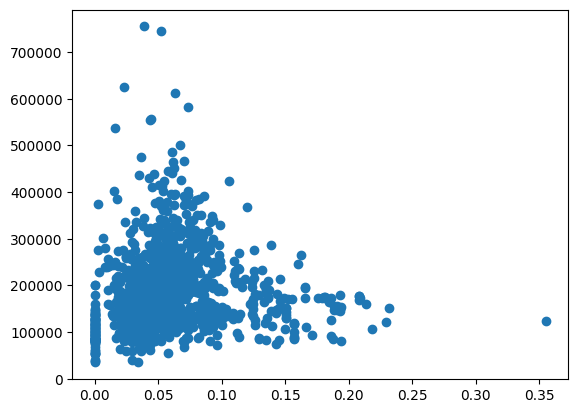

In [124]:
# По графику видно, что в основном, малое соотношение означает больший разброс стоимости, 
# тогда как с увеличением больших цен на жильё не наблюдается
plt.scatter(df['GarageLot'], df['SalePrice'])

## Задание 4 

Подготовьте данные:

1. Разделите данные на тренировочную и тестовую выборки.

In [125]:
train, test = train_test_split(df, test_size=0.25, random_state=42)

2. Закодируйте категориальные признаки в тренировочной и тестовой выборках.

In [126]:
df.describe(exclude='number')

,Street,BldgType,RoofStyle,ExterQual,ExterCond,Foundation,Heating,HeatingQC,CentralAir,KitchenQual,DateSold,SaleCondition
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460
unique,2,5,6,4,5,6,6,5,2,4,55,6
top,Pave,1Fam,Gable,TA,TA,PConc,GasA,Ex,Y,TA,7/2006,Normal
freq,1454,1220,1141,906,1282,647,1428,741,1365,735,67,1198


In [127]:
for col in df.select_dtypes(exclude='number').drop('DateSold', axis=1):
    df = pd.concat([df, pd.get_dummies(df[col]).astype(int).iloc[:, :-1]], axis=1)

df['MonthSold'] = df['DateSold'].apply(lambda x: int(x.split('/')[0]))
df['YearSold'] = df['DateSold'].apply(lambda x: int(x.split('/')[1]))
df = df.drop(df.select_dtypes(exclude='number').columns, axis=1)
df

,LotArea_M,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF_M,GrLivArea_M,Bath,GarageArea_M,SalePrice,...,Ex,Fa,Gd,Abnorml,AdjLand,Alloca,Family,Normal,MonthSold,YearSold
0,785.030350,7,5,2003,2003,79.524968,158.864130,3,50.910844,208500,...,0,0,1,0,0,0,0,1,2,2008
1,891.868800,6,8,1976,1976,117.243586,117.243586,2,42.735380,181500,...,0,0,0,0,0,0,0,1,5,2007
2,1045.158750,7,5,2001,2002,85.470760,165.924758,3,56.485024,223500,...,0,0,1,0,0,0,0,1,9,2008
3,887.223650,7,5,1915,1970,70.234668,159.514451,1,59.643726,140000,...,0,0,1,1,0,0,0,0,2,2006
4,1324.796780,8,5,2000,2000,106.373935,204.200794,3,77.666908,250000,...,0,0,1,0,0,0,0,1,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,735.513051,6,5,1999,2000,88.536559,153.011241,3,42.735380,175000,...,0,0,0,0,0,0,0,1,8,2007
1456,1223.997025,6,6,1978,1988,143.256426,192.587919,2,46.451500,210000,...,0,0,0,0,0,0,0,1,2,2010
1457,840.028926,7,9,1941,2006,107.024256,217.393020,2,23.411556,266500,...,0,0,1,0,0,0,0,1,5,2010
1458,902.738451,5,6,1950,1996,100.149434,100.149434,1,22.296720,142125,...,0,0,1,0,0,0,0,1,4,2010


3. Подготовьте числовые признаки в тренировочной и тестовой выборках к передаче в модель: приведите их к единому масштабу.

In [129]:
# df = pd.concat([pd.DataFrame(normalize(df.drop('SalePrice', axis=1)), 
#                              columns=df.columns[df.columns != 'SalePrice']), 
#                 df[['SalePrice']]], axis=1)
df = pd.DataFrame(normalize(df, axis=0), columns=df.columns)
df

,LotArea_M,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF_M,GrLivArea_M,Bath,GarageArea_M,SalePrice,...,Ex,Fa,Gd,Abnorml,AdjLand,Alloca,Family,Normal,MonthSold,YearSold
0,0.015255,0.029293,0.023017,0.026589,0.026409,0.019570,0.027902,0.03732,0.027632,0.027617,...,0.0,0.0,0.04131,0.000000,0.0,0.0,0.0,0.028892,0.007613,0.026174
1,0.017331,0.025108,0.036827,0.026231,0.026053,0.028851,0.020592,0.02488,0.023195,0.024041,...,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.028892,0.019032,0.026161
2,0.020310,0.029293,0.023017,0.026563,0.026396,0.021033,0.029142,0.03732,0.030657,0.029604,...,0.0,0.0,0.04131,0.000000,0.0,0.0,0.0,0.028892,0.034258,0.026174
3,0.017241,0.029293,0.023017,0.025421,0.025974,0.017283,0.028016,0.01244,0.032372,0.018544,...,0.0,0.0,0.04131,0.099504,0.0,0.0,0.0,0.000000,0.007613,0.026148
4,0.025743,0.033477,0.023017,0.026550,0.026369,0.026177,0.035865,0.03732,0.042154,0.033114,...,0.0,0.0,0.04131,0.000000,0.0,0.0,0.0,0.028892,0.045678,0.026174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.014292,0.025108,0.023017,0.026536,0.026369,0.021787,0.026874,0.03732,0.023195,0.023180,...,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.028892,0.030452,0.026161
1456,0.023785,0.025108,0.027620,0.026257,0.026211,0.035253,0.033825,0.02488,0.025212,0.027816,...,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.028892,0.007613,0.026200
1457,0.016323,0.029293,0.041430,0.025766,0.026448,0.026337,0.038182,0.02488,0.012707,0.035300,...,0.0,0.0,0.04131,0.000000,0.0,0.0,0.0,0.028892,0.019032,0.026200
1458,0.017542,0.020923,0.027620,0.025886,0.026317,0.024645,0.017590,0.01244,0.012102,0.018825,...,0.0,0.0,0.04131,0.000000,0.0,0.0,0.0,0.028892,0.015226,0.026200


In [130]:
train, test = train_test_split(df, test_size=0.25, random_state=42)
x_train, y_train = train.drop('SalePrice', axis=1), train['SalePrice']
x_test, y_test = test.drop('SalePrice', axis=1), test['SalePrice']

In [131]:
x_train

,LotArea_M,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF_M,GrLivArea_M,Bath,GarageArea_M,GarageLot,...,Ex,Fa,Gd,Abnorml,AdjLand,Alloca,Family,Normal,MonthSold,YearSold
1023,0.005744,0.029293,0.023017,0.026616,0.026448,0.030772,0.024541,0.02488,0.022035,0.053886,...,0.0,0.0,0.04131,0.0,0.0,0.0,0.0,0.028892,0.019032,0.026174
810,0.018306,0.025108,0.027620,0.026204,0.026356,0.023776,0.021359,0.02488,0.024405,0.018729,...,0.0,0.0,0.04131,0.0,0.0,0.0,0.0,0.028892,0.003806,0.026148
1384,0.016356,0.025108,0.023017,0.025740,0.025710,0.012803,0.020527,0.01244,0.014119,0.012126,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.028892,0.038065,0.026187
626,0.022281,0.020923,0.023017,0.026019,0.026079,0.022359,0.023203,0.01244,0.014421,0.009092,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.028892,0.030452,0.026161
813,0.017602,0.025108,0.027620,0.025992,0.025816,0.032966,0.023529,0.02488,0.015177,0.012113,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.028892,0.015226,0.026161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,0.016820,0.025108,0.023017,0.026629,0.026448,0.030040,0.021441,0.02488,0.022186,0.018530,...,0.0,0.0,0.04131,0.0,0.0,0.0,0.0,0.028892,0.011419,0.026161
1130,0.014088,0.016739,0.013810,0.025594,0.025710,0.025651,0.032324,0.02488,0.029044,0.028960,...,0.0,0.0,0.04131,0.0,0.0,0.0,0.0,0.028892,0.045678,0.026187
1294,0.014753,0.020923,0.032224,0.025952,0.026237,0.019752,0.014098,0.01244,0.028842,0.027464,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.028892,0.015226,0.026148
860,0.013796,0.029293,0.036827,0.025461,0.026343,0.020850,0.023268,0.02488,0.010891,0.011090,...,0.0,0.0,0.04131,0.0,0.0,0.0,0.0,0.028892,0.022839,0.026161


## Задание 5

Займитесь обучением модели:

1. Обучите модель линейной регрессии без регуляризации. Посмотрите на веса полученной модели. Сделайте предсказания по обучающей и тестовой выборкам.

In [132]:
lnr = LinearRegression()
lnr.fit(x_train, y_train)

print(lnr.intercept_)
print(lnr.coef_)

-0.11300402545462548
[ 3.53848414e-02  4.56797718e-01  1.52195240e-01  3.76572378e+00
  2.59832354e-01  6.14454509e-02  3.40100396e-01  2.43006028e-02
  1.50419307e-01 -6.97252907e-02 -1.51929401e-04 -1.51008163e-03
 -9.51800402e-03 -2.00221505e-02 -3.53262934e-03 -1.37614502e-04
 -4.94550696e-02 -2.14259675e-03 -9.32445998e-03 -2.65379131e-03
  2.68417010e-02  4.83907707e-03  2.38895311e-02 -2.27368490e-03
  1.11152254e-03 -3.48944297e-03  9.67952775e-04  3.48546739e-02
  8.22174813e-02  9.12529282e-02  1.12534186e-02  6.47173191e-03
 -2.72811363e-03 -1.46364188e-01 -1.43614911e-02 -1.14173578e-02
 -1.22919381e-02  8.78544050e-03  4.30530988e-03 -6.94051724e-03
 -5.89594917e-04 -5.02902093e-03  5.65946984e-02  4.85165418e-03
  1.64060372e-02 -2.11959757e-02 -7.90341448e-04  1.58072826e-02
 -1.15812708e-02 -4.61052618e-02  5.46498644e-04  1.80999563e-01]


In [133]:
y_train_pred = lnr.predict(x_train)
y_test_pred = lnr.predict(x_test)

print(f"MAE: train - {mean_absolute_error(y_train, y_train_pred)}, test - {mean_absolute_error(y_test, y_test_pred)}")
print(f"MSE: train - {mean_squared_error(y_train, y_train_pred)}, test - {mean_squared_error(y_test, y_test_pred)}")
print(f"R^2: train - {lnr.score(x_train, y_train)}, test - {lnr.score(x_test, y_test)}")

MAE: train - 0.002597802792688792, test - 0.0028328943196777824
MSE: train - 2.0359702834740605e-05, test - 2.0632213597082718e-05
R^2: train - 0.8088677911803053, test - 0.832130017984437


2. Понаблюдайте, как ведёт себя модель с L1-регуляризацией (Lasso). Найдите лучший параметр регуляризации. Сделайте предсказания по обучающей и тестовой выборкам, замерьте качество с помощью MAE, MSE, $R^2$. Для воспроизводимости результатов задайте параметр `random_state=42` при определении модели Lasso.

In [134]:
max_score = 0
alpha = 1e-10
for i in range(-24, 0):
    lasso = Lasso(alpha=10**(i / 2), max_iter=6000)
    lasso.fit(x_train, y_train)

    score = lasso.score(x_test, y_test)
    if max_score < score:
        max_score = score
        alpha = 10**(i / 2)

print(max_score, alpha)

0.8321782525230536 1e-08


In [135]:
lasso = Lasso(alpha=alpha, max_iter=6000, random_state=42)
lasso.fit(x_train, y_train)

Lasso(alpha=1e-08, max_iter=6000, random_state=42)

In [136]:
y_train_pred = lasso.predict(x_train)
y_test_pred = lasso.predict(x_test)

print(f"MAE: train - {mean_absolute_error(y_train, y_train_pred)}, test - {mean_absolute_error(y_test, y_test_pred)}")
print(f"MSE: train - {mean_squared_error(y_train, y_train_pred)}, test - {mean_squared_error(y_test, y_test_pred)}")
print(f"R^2: train - {lasso.score(x_train, y_train)}, test - {lasso.score(x_test, y_test)}")

MAE: train - 0.0025996922783684587, test - 0.0028306923331741884
MSE: train - 2.03653391383586e-05, test - 2.0626285287020697e-05
R^2: train - 0.8088148788579188, test - 0.8321782525230536


Посмотрите на веса полученной модели. Какой вывод можно сделать?

In [ ]:
print(lasso.intercept_)
print(lasso.coef_.round(3))

-0.09527550000518184
[ 3.500e-02  4.600e-01  1.510e-01  3.507e+00  1.000e-02  6.400e-02
  3.340e-01  2.900e-02  1.510e-01 -7.000e-02 -0.000e+00 -2.000e-03
 -1.000e-02 -2.000e-02 -3.000e-03  1.000e-03 -3.800e-02 -1.000e-03
 -4.000e-03 -2.000e-03  2.700e-02  5.000e-03  2.500e-02 -2.000e-03
  1.000e-03 -3.000e-03  1.000e-03  2.900e-02  7.200e-02  8.200e-02
  1.000e-02  5.000e-03 -2.000e-03 -1.340e-01 -1.300e-02 -1.000e-02
 -1.200e-02  1.000e-02  4.000e-03 -7.000e-03 -1.000e-03 -6.000e-03
  5.700e-02  4.000e-03  1.800e-02 -2.200e-02 -1.000e-03  1.600e-02
 -1.200e-02 -4.700e-02  0.000e+00  0.000e+00]


In [139]:
(pd.DataFrame({'coef': lasso.coef_.tolist()}, index=lasso.feature_names_in_)
 .sort_values('coef', ascending=False, key=lambda x: abs(x)))

,coef
YearBuilt,3.507198
OverallQual,0.459590
GrLivArea_M,0.333938
GarageArea_M,0.151207
OverallCond,0.150566
GasA,-0.134457
PConc,0.082100
CBlock,0.071780
GarageLot,-0.069586
TotalBsmtSF_M,0.063502


In [150]:
print((lasso.coef_ > 0).sum(), (lasso.coef_ < 0).sum(), (lasso.coef_ == 0).sum(), sep=', ')

27, 24, 1


1 весовой коэффициент получился нулевым (YearSold), а ненулевые в большинстве своём положительные. 

Следовательно, признак с нулевым весом можно удалить из выборки, так как на результат это не повлияет.

3. Понаблюдайте, как ведёт себя модель с L2-регуляризацией (Ridge). Найдите лучший параметр регуляризации. Сделайте предсказания по обучающей и тестовой выборкам, замерьте качество с помощью MAE, MSE, $R^2$. Для воспроизводимости результатов задайте параметр `random_state=42` при определении модели Ridge.

In [144]:
max_score = 0
alpha = 1e-10
for i in range(-24, 0):
    ridge = Ridge(alpha=10**(i / 2), max_iter=6000)
    ridge.fit(x_train, y_train)

    score = ridge.score(x_test, y_test)
    if max_score < score:
        max_score = score
        alpha = 10**(i / 2)

print(max_score, alpha)

0.8321313809680003 1e-07


In [145]:
ridge = Ridge(alpha=alpha, max_iter=3000, random_state=42)
ridge.fit(x_train, y_train)

Ridge(alpha=1e-07, max_iter=3000, random_state=42)

In [146]:
y_train_pred = ridge.predict(x_train)
y_test_pred = ridge.predict(x_test)

print(f"MAE: train - {mean_absolute_error(y_train, y_train_pred)}, test - {mean_absolute_error(y_test, y_test_pred)}")
print(f"MSE: train - {mean_squared_error(y_train, y_train_pred)}, test - {mean_squared_error(y_test, y_test_pred)}")
print(f"R^2: train - {ridge.score(x_train, y_train)}, test - {ridge.score(x_test, y_test)}")

MAE: train - 0.0025978463784212587, test - 0.00283275636658039
MSE: train - 2.035970750026907e-05, test - 2.0632046078341905e-05
R^2: train - 0.8088677473813969, test - 0.8321313809680003


Посмотрите на веса полученной модели. Какой вывод можно сделать?

In [147]:
print(ridge.intercept_)
print(ridge.coef_.round(3))

-0.11154605045348714
[ 3.500e-02  4.570e-01  1.520e-01  3.754e+00  2.630e-01  6.200e-02
  3.400e-01  2.400e-02  1.500e-01 -7.000e-02 -0.000e+00 -2.000e-03
 -1.000e-02 -2.000e-02 -4.000e-03 -0.000e+00 -4.900e-02 -2.000e-03
 -9.000e-03 -3.000e-03  2.700e-02  5.000e-03  2.400e-02 -2.000e-03
  1.000e-03 -3.000e-03  1.000e-03  3.500e-02  8.200e-02  9.100e-02
  1.100e-02  6.000e-03 -3.000e-03 -1.460e-01 -1.400e-02 -1.100e-02
 -1.200e-02  9.000e-03  4.000e-03 -7.000e-03 -1.000e-03 -5.000e-03
  5.700e-02  5.000e-03  1.600e-02 -2.100e-02 -1.000e-03  1.600e-02
 -1.200e-02 -4.600e-02  1.000e-03  1.340e-01]


In [148]:
(pd.DataFrame({'coef': ridge.coef_.tolist()}, index=ridge.feature_names_in_)
 .sort_values('coef', ascending=False, key=lambda x: abs(x)))

,coef
YearBuilt,3.753577
OverallQual,0.456946
GrLivArea_M,0.339865
YearRemodAdd,0.262926
OverallCond,0.152004
GarageArea_M,0.150463
GasA,-0.146300
YearSold,0.134468
PConc,0.091187
CBlock,0.082131


In [151]:
print((ridge.coef_ > 0).sum(), (ridge.coef_ < 0).sum(), (ridge.coef_ == 0).sum(), sep=', ')

27, 25, 0


Все веса ненулевые, но те признаки, которые являлись значимыми в Lasso, оказались значимыми и в Ridge регрессии и с тем же знаком

## Задание 6

Ответьте на следующие вопросы:

1. В последней обученной модели выберите три признака с наибольшими положительными коэффициентами. Можно ли утверждать, что чем больше значения этих признаков, тем больше сумма сделки?

In [152]:
pd.DataFrame({'coef': ridge.coef_.tolist()}, index=ridge.feature_names_in_).sort_values('coef', ascending=False)[:3]

,coef
YearBuilt,3.753577
OverallQual,0.456946
GrLivArea_M,0.339865


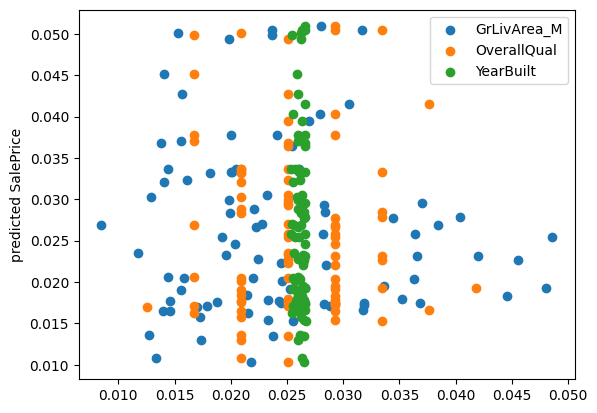

In [ ]:
tt = pd.concat([test, pd.DataFrame(y_test_pred, columns=['pred'])], axis=1).sort_values('pred')

plt.scatter(tt['GrLivArea_M'], tt['pred'], label='GrLivArea_M')
plt.scatter(tt['OverallQual'], tt['pred'], label='OverallQual')
plt.scatter(tt['YearBuilt'], tt['pred'], label='YearBuilt')
plt.ylabel('predicted SalePrice')
plt.legend()
plt.show()

Так как данные признаки количественные, то их рост скорее всего увеличит стоимость сделки.

ИЗ графика выше видно, что предсказанная стоимость не сильно зависит от увеличения значений (в тестовой выборке), следовательно, не факт, что рост данных значений повлечёт рост стоимости, т. к. влияют другие признаки в совокупности.

2. В последней обученной модели выберите три признака с наибольшими отрицательными коэффициентами. Можно ли утверждать, что чем больше значения этих признаков, тем меньше сумма сделки?

In [178]:
pd.DataFrame({'coef': ridge.coef_.tolist()}, index=ridge.feature_names_in_).sort_values('coef')[:3]

,coef
GasA,-0.146300
GarageLot,-0.069725
Gable,-0.049486


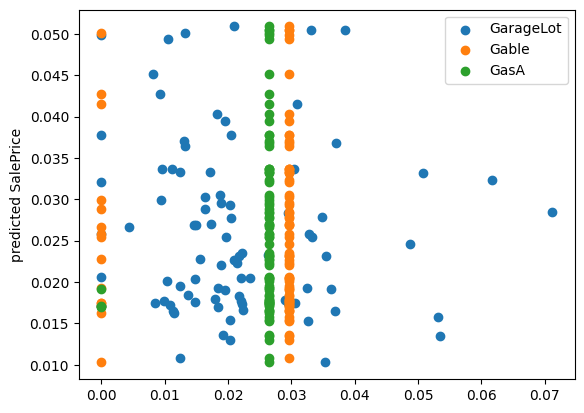

In [ ]:
plt.scatter(tt['GarageLot'], tt['pred'], label='GarageLot')
plt.scatter(tt['Gable'], tt['pred'], label='Gable')
plt.scatter(tt['GasA'], tt['pred'], label='GasA')
plt.ylabel('predicted SalePrice')
plt.legend()
plt.show()

Да, увеличение значений данных признаков повлечёт увеличение стоимости.

Из графика видно, что много предсказанных стоимостей при увеличении значений признаков находятся ниже, чем при уменьшении, следовательно данные признаки влияют на результат предсказаний (на тестовой выборке) в негативную сторону.

3. В модели Lasso выберите три признака с нулевыми коэффициентами. Как вы думаете, почему модель их исключила? Можно ли смело утверждать, что сумма сделки от этих признаков не зависит?

In [182]:
pd.DataFrame({'coef': lasso.coef_.tolist()}, index=lasso.feature_names_in_).sort_values('coef', key=lambda x: abs(x))[:3]

,coef
YearSold,0.000000
Grvl,-0.000119
MonthSold,0.000274


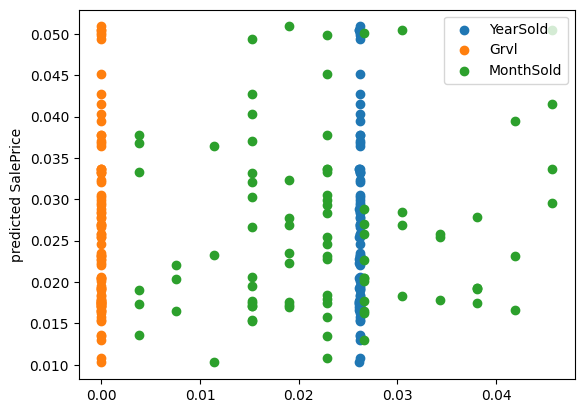

In [183]:
plt.scatter(tt['YearSold'], tt['pred'], label='YearSold')
plt.scatter(tt['Grvl'], tt['pred'], label='Grvl')
plt.scatter(tt['MonthSold'], tt['pred'], label='MonthSold')
plt.ylabel('predicted SalePrice')
plt.legend()
plt.show()

Так как данные распределены равномерно для данных признаков, то можно утверждать, что стоимость от них независит (либо недостаточно данных для исследования).

## Заключение

В этом модуле с помощью регуляризации вы научились обучать модели линейной регрессии с регуляризацией, подбирать коэффициент регуляризации alpha, а также отбирать признаки с помощью L1-регуляризации. 